In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Air_data = pd.read_excel('Airlines+Data.xlsx')

In [5]:
Air_data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [6]:
Air_data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


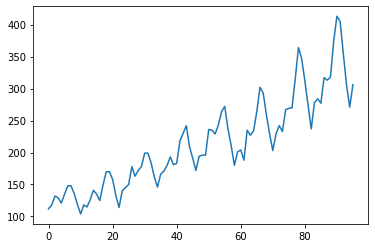

In [7]:
Air_data.Passengers.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2ABF4E370>]],
      dtype=object)

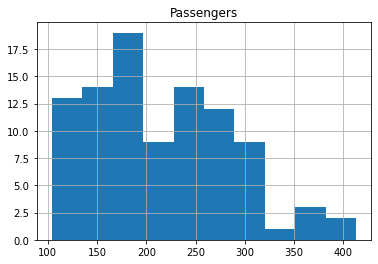

In [8]:
Air_data.hist()

In [12]:
Train = Air_data.head()
Test = Air_data.tail()

### Moving Average

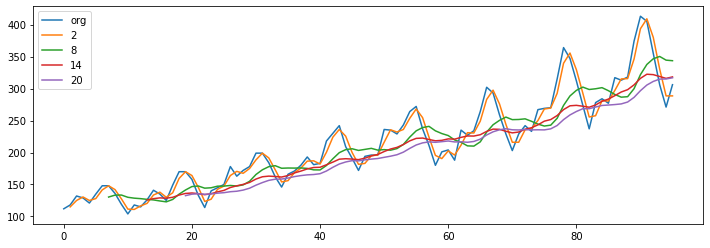

In [13]:
plt.figure(figsize=(12,4))
Air_data.Passengers.plot(label='org')
for i in range(2,24,6):
    Air_data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

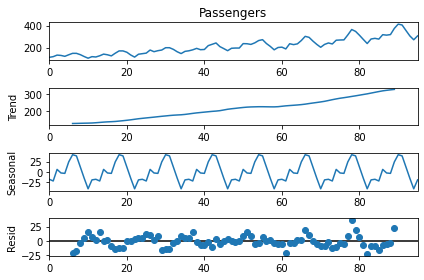

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(Air_data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

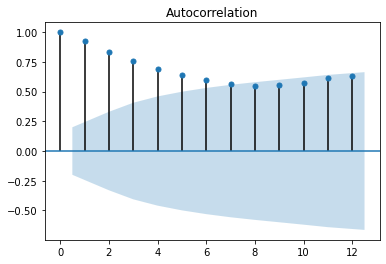

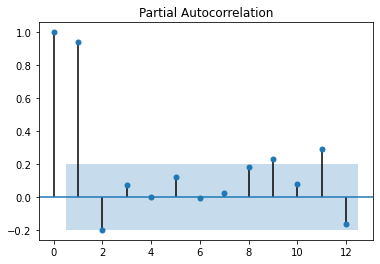

In [15]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Air_data.Passengers,lags=12)
tsa_plots.plot_pacf(Air_data.Passengers,lags=12)
plt.show()

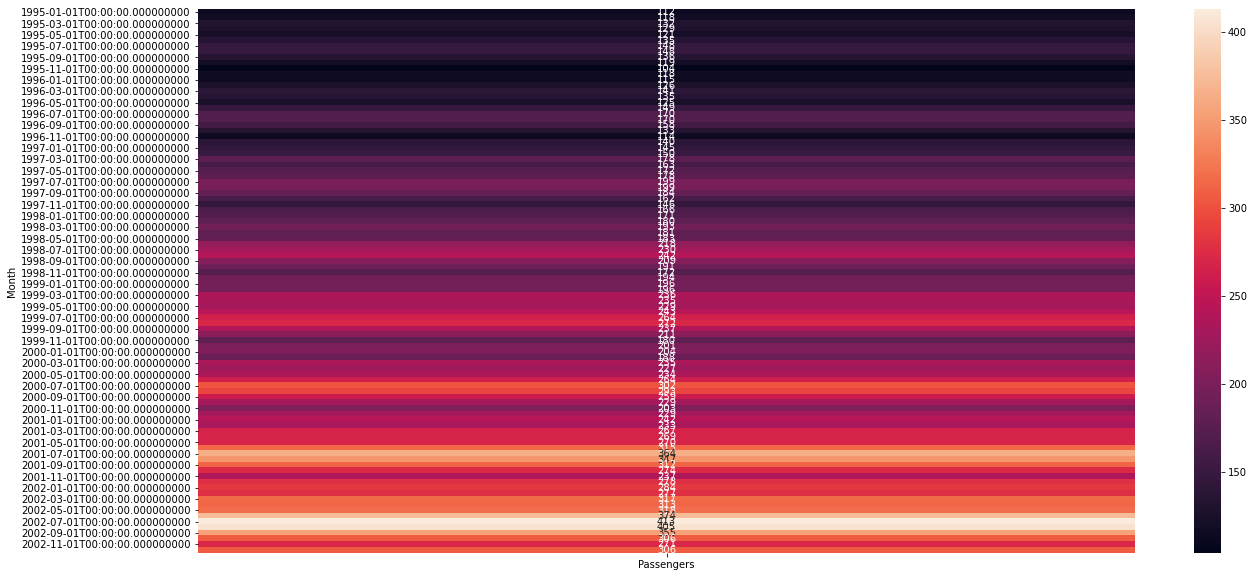

In [28]:
plt.figure(figsize = (21,10))
heatmap_sales = pd.pivot_table(data = Air_data,values='Passengers',index='Month',aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_sales,annot=True,fmt='g')

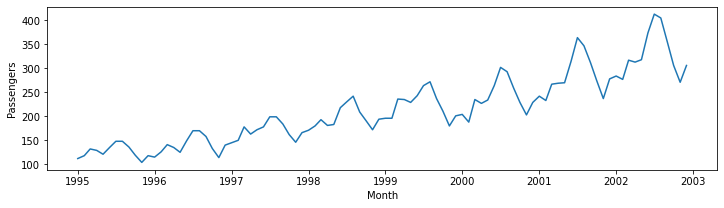

In [30]:
plt.figure(figsize=(12,3))
sns.lineplot(x="Month",y="Passengers",data=Air_data) 

### Evaluation Metric MAPE

In [32]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
SE_model = SimpleExpSmoothing(Train['Passengers']).fit(smoothing_level=0.2)
pred_SE = SE_model.predict(start = Test.index[0],end=Test.index[-1])
MAPE(pred_SE,Test.Passengers)

C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


61.895699477692155

### Holt method

In [35]:
from statsmodels.tsa.holtwinters import Holt
hw_model = Holt(Train['Passengers']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


10.997141572472197

### Holts winter exponential smoothing with additive seasonality and additive trend

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=2).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


15.244618956969543

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [37]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=2).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


14.742302372148663

### Final Model by combining train and test

In [39]:
hwe_model_add_add = ExponentialSmoothing(Air_data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\python\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [40]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     320.924021
97     313.638039
98     352.925020
99     350.350301
100    356.060922
101    408.899129
102    446.143114
103    433.358026
104    382.762459
105    336.170254
dtype: float64